In [1]:
import os

In [2]:
HOMEDIR = os.environ['HOME']
COURSEDIR = f"{HOMEDIR}/work/uq/engg4811"
# PREDDIR = f"{COURSEDIR}/trainlogs/bracewell01/salsa" #2021-10-12-16:20rellis  salsa
PREDDIR = f"{COURSEDIR}/trainlogs/ec2-01/salsa"
DATADIR = f"{COURSEDIR}/datasets/Rellis-3D"

In [3]:
from rellis_utils import *


Bad key text.latex.unicode in file /home/nhat/miniconda3/envs/salsanext/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file /home/nhat/miniconda3/envs/salsanext/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key pgf.debug in file /home/nhat/miniconda3/envs/salsanext/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 444 ('pgf.debug           : False')
You probably need to get

In [ ]:
bracewell_evaluator = Evaluator(
    data_dir = DATADIR,
    pred_dir = f'{COURSEDIR}/trainlogs/bracewell01/salsa',
    desc     = 'training on 2 GPU, batch size = 12'
)

In [ ]:
bracewell_evaluator.calc_iou()

In [ ]:
bracewell_evaluator.plot_iou()

In [ ]:
ec2_evaluator = Evaluator(
    data_dir = DATADIR,
    pred_dir = f'{COURSEDIR}/trainlogs/ec2-01/salsa',
    desc     = 'training on 1 GPU, batch size = 7'
)

In [ ]:
ec2_evaluator.calc_iou()

In [ ]:
ec2_evaluator.plot_iou()

In [9]:
rellis_config = get_config()
classnames = get_classnames(rellis_config)

In [4]:
ftrain = get_split_frequency(
    split_file = f'{DATADIR}/pt_train.lst',
    data_dir = DATADIR,
    desc='Default Train Split',
    color='blue'
)

100%|████████████████████████████████████████████| 7800/7800 [00:34<00:00, 226.48it/s]


In [5]:
fval = get_split_frequency(
    split_file = f'{DATADIR}/pt_val.lst',
    data_dir = DATADIR,
    desc='Default Validation Split',
    color='orange'
)

100%|████████████████████████████████████████████| 2413/2413 [00:10<00:00, 223.96it/s]


In [6]:
ftest = get_split_frequency(
    split_file = f'{DATADIR}/pt_test.lst',
    data_dir = DATADIR,
    desc='Default Test Split',
    color='green'
)

100%|████████████████████████████████████████████| 3343/3343 [00:13<00:00, 249.05it/s]


3


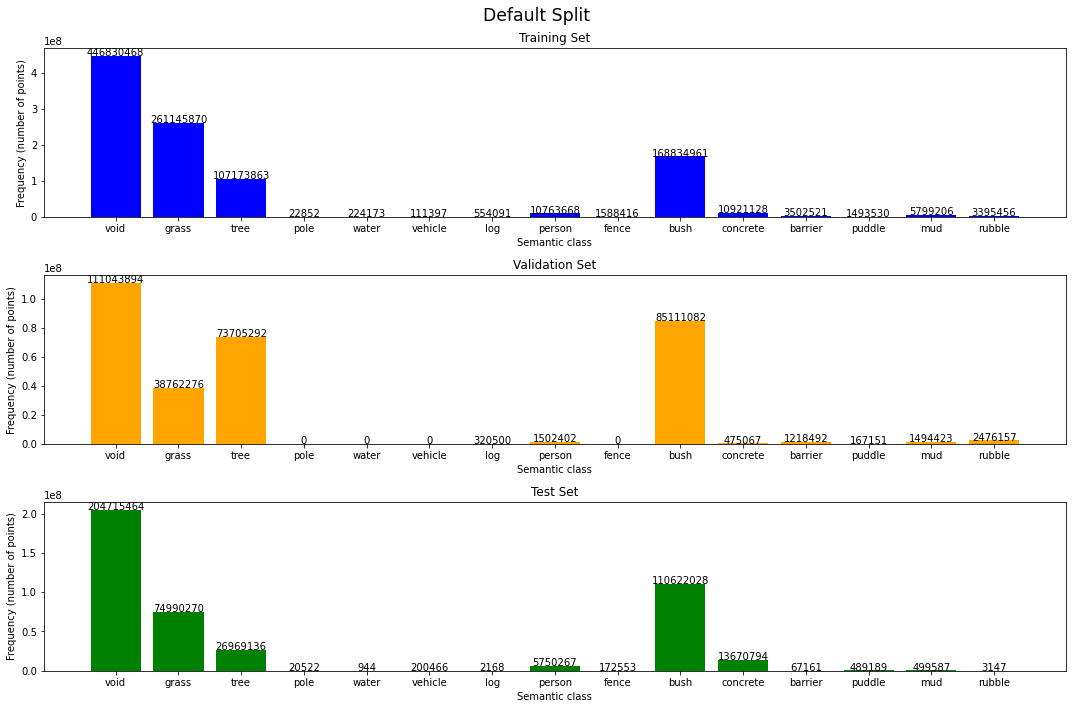

In [31]:
fig, axs = plt.subplots(nrows=3, figsize=(15, 10))
freq = [ftrain, fval, ftest]
s = ['Training Set', 'Validation Set', 'Test Set']
c = ['blue', 'orange', 'green']
print(len(axs))

for i in range(len(axs)):
    axs[i].bar(classnames, freq[i], color=c[i])
    axs[i].set_xlabel('Semantic class')
    axs[i].set_ylabel('Frequency (number of points)')
    axs[i].set_title(s[i])
    for index, value in enumerate(freq[i]):
        axs[i].text(index, value, str(freq[i][index]), ha='center')

fig.suptitle('Default Split', size='xx-large')
fig.tight_layout()

# ax_train = fig.add_axes([0, 0, 2, 1])
# ax_train.bar(classnames, ftrain, color='b')
# ax_train.set_xlabel("Semantic class")
# ax_train.set_ylabel("Fequency (number of points)")
# ax_train.set_title(f"Frequency of all semantic classes - Training Set")
# for index, value in enumerate(ftrain):
#     ax_train.text(index, value, str(ftrain[index]), ha="center")
    
# # ax_val = fig.add_axes([0, 0, 2, 1])
# ax_val.bar(classnames, fval, color='orange')
# ax_val.set_xlabel("Semantic class")
# ax_val.set_ylabel("Fequency (number of points)")
# ax_val.set_title(f"Frequency of all semantic classes - Validation Set")
# for index, value in enumerate(fval):
#     ax_val.text(index, value, str(fval[index]), ha="center")

# plt.show()

In [ ]:
config = get_config()
classnames = get_classnames(config)
label_to_cid_map = get_label_to_cid_map(config)
for i, c in enumerate(classnames):
    print(f'class: {c} '.ljust(20) + f'=> {ftrain[i]}')

In [32]:
ftrain2 = get_split_frequency(
    split_file = f'pt_train.lst',
    data_dir = DATADIR,
    desc='New Train Split',
    color='blue'
)

100%|████████████████████████████████████████████| 9486/9486 [00:42<00:00, 225.22it/s]


In [33]:
fval2 = get_split_frequency(
    split_file = f'pt_val.lst',
    data_dir = DATADIR,
    desc='New Validation Split',
    color='orange'
)

100%|████████████████████████████████████████████| 2034/2034 [00:08<00:00, 241.82it/s]


In [34]:
ftest2 = get_split_frequency(
    split_file = f'pt_test.lst',
    data_dir = DATADIR,
    desc='New Test Split',
    color='green'
)

100%|████████████████████████████████████████████| 2036/2036 [00:09<00:00, 207.43it/s]


3


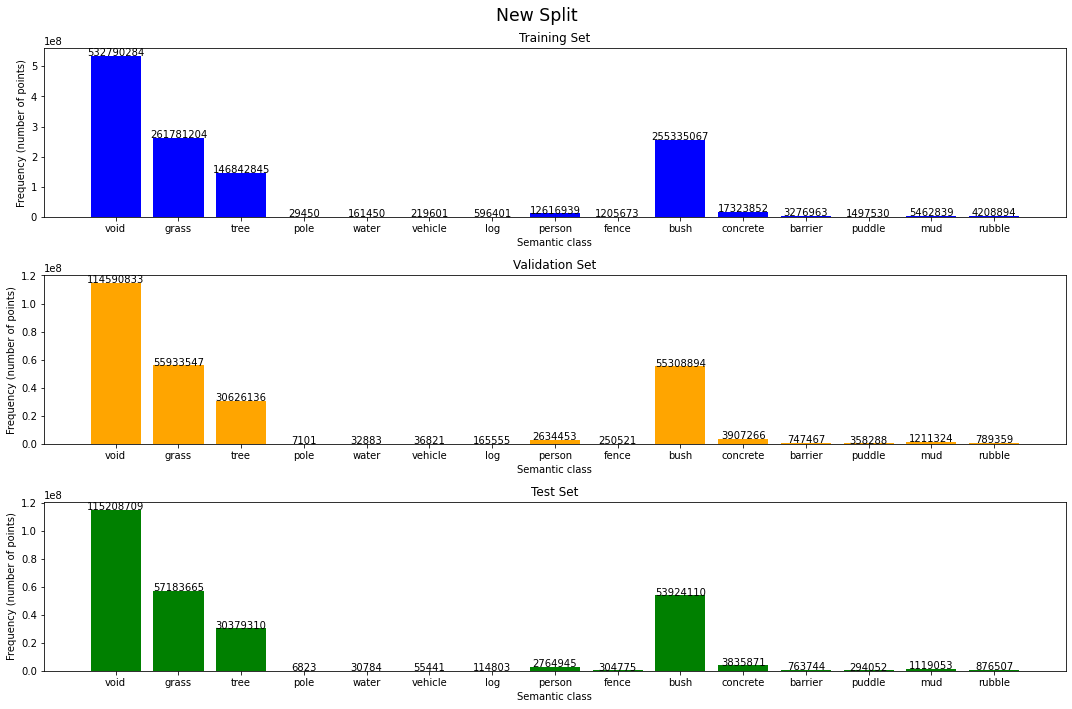

In [35]:
fig, axs = plt.subplots(nrows=3, figsize=(15, 10))
freq = [ftrain2, fval2, ftest2]
s = ['Training Set', 'Validation Set', 'Test Set']
c = ['blue', 'orange', 'green']
print(len(axs))

for i in range(len(axs)):
    axs[i].bar(classnames, freq[i], color=c[i])
    axs[i].set_xlabel('Semantic class')
    axs[i].set_ylabel('Frequency (number of points)')
    axs[i].set_title(s[i])
    for index, value in enumerate(freq[i]):
        axs[i].text(index, value, str(freq[i][index]), ha='center')

fig.suptitle('New Split', size='xx-large')
fig.tight_layout()